<a href="https://colab.research.google.com/github/0096uk/0096uk/blob/main/evolent_health_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Libraries and Data

In [72]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [73]:
data = '/content/gdrive/My Drive/Colab Notebooks/BeerDataScienceProject.csv'

In [74]:
df = pd.read_csv(data,encoding='latin1')

In [75]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


Getting Basic information about the data

In [76]:
#df.shape
#df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


after looking at the data the following basic information about the features can be obtained

1) beer_ABV : Alcohol by volume content of a beer
2) beer_beerId : Unique ID for beer identification
3) beer_brewerId : Unique ID identifying the brewer
4) beer_name : Name of the beer
5) beer_style : Beer Category
6) review_appearance: Rating based on how the beer looks [Range : 1-5]
7) review_palatte : Rating based on how the beer interacts with the palate [Range : 1-5]
8) review_overall : Overall experience of the beer is combined in this rating [Range : 1-5]
9) review_taste : Rating based on how the beer actually tastes [Range : 1-5]
10) review_profileName: Reviewer’s profile name / user ID
11) review_aroma : Rating based on how the beer smells [Range : 1-5]
12) review_text : Review comments/observations in text format
13) review_time : Time in UNIX format when review was recorded
There are 13 features and 528870 records


Lets check the mean, max, mean and other properties of the data for numerical and categorical data both

In [77]:
df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


The IQR [Inter Quartile Range - that is between 25 % - 75 %] for the beer_ABV feature lies between the values 5.3 to 8.5 with a mean value of around 7.0. For beer_ABV data we can observe outliers values where the max value for the beer ABV contents is around 57.7
Based on the count of the beer_ABV we can observe some Null values exists for these feature.
beer_brewerId - although it is a numeric value but it signifies a specific value of corresponding to each brewery name.
review_appearance, review_palette, review_taste, review_aroma and review_overall - are the key indicators of the various aspect related to the beer review. The IQR for these lies between 3.5 - 4.5.
review_time is a numeric feaure which records the UNIX time when the review was given.

In [78]:
df.describe(exclude=np.number)

,beer_name,beer_style,review_profileName,review_text
count,528870,528870,528755,528751
unique,18339,104,22800,528371
top,Sierra Nevada Celebration Ale,American IPA,northyorksammy,#NAME?
freq,3000,43369,1858,92


Extracting Year from the review_time( provided in UNIX format)

In [79]:
df['review_year'] = pd.DatetimeIndex(pd.to_datetime(df['review_time'], unit='s')).year
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010


Checking count of null values feature wise



In [80]:
df.isnull().sum().sort_values(ascending = False)

beer_ABV              20280
review_text             119
review_profileName      115
review_year               0
review_time               0
review_aroma              0
review_taste              0
review_overall            0
review_palette            0
review_appearance         0
beer_style                0
beer_name                 0
beer_brewerId             0
beer_beerId               0
dtype: int64

Percentage of missing values per feaure

In [81]:
missing_percentages = df.isnull().sum().sort_values(ascending = False) / len(df)*100
missing_percentages[missing_percentages != 0]

beer_ABV              3.834591
review_text           0.022501
review_profileName    0.021744
dtype: float64

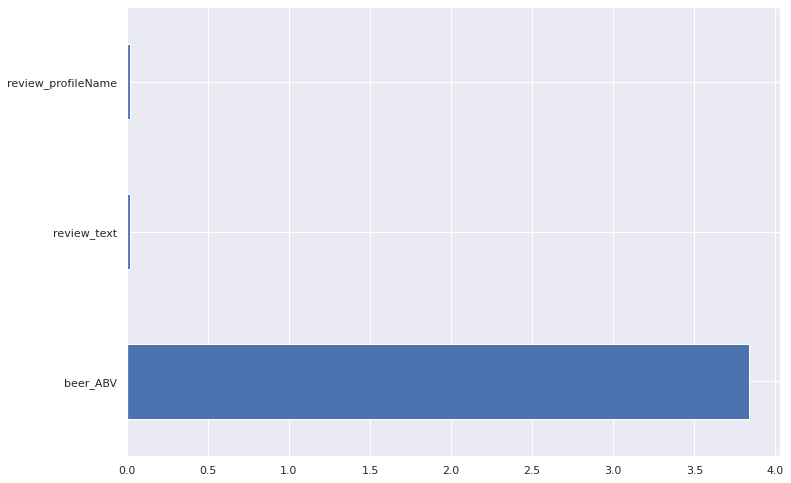

In [82]:
missing_percentages.loc[missing_percentages != 0].plot(kind = 'barh')

The percentage of null values is max 3.85 , which is a very small part of the dataset hence we deicde to drop the null values

In [83]:
df = df.dropna()
df.isna().sum()

beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
review_year           0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508358 entries, 0 to 528796
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508358 non-null  float64
 1   beer_beerId         508358 non-null  int64  
 2   beer_brewerId       508358 non-null  int64  
 3   beer_name           508358 non-null  object 
 4   beer_style          508358 non-null  object 
 5   review_appearance   508358 non-null  float64
 6   review_palette      508358 non-null  float64
 7   review_overall      508358 non-null  float64
 8   review_taste        508358 non-null  float64
 9   review_profileName  508358 non-null  object 
 10  review_aroma        508358 non-null  float64
 11  review_text         508358 non-null  object 
 12  review_time         508358 non-null  int64  
 13  review_year         508358 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 58.2+ MB


Lets Remove the duplicate data

1) Sort by "review_overall" in descending order
2) Keep the highest rating from each "review_profilename" and drop the rest

In [85]:
df = df.sort_values('review_overall', ascending=False)

In [86]:
df = df.drop_duplicates(subset= ['review_profileName','beer_beerId'], keep='first')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503700 entries, 492945 to 39638
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            503700 non-null  float64
 1   beer_beerId         503700 non-null  int64  
 2   beer_brewerId       503700 non-null  int64  
 3   beer_name           503700 non-null  object 
 4   beer_style          503700 non-null  object 
 5   review_appearance   503700 non-null  float64
 6   review_palette      503700 non-null  float64
 7   review_overall      503700 non-null  float64
 8   review_taste        503700 non-null  float64
 9   review_profileName  503700 non-null  object 
 10  review_aroma        503700 non-null  float64
 11  review_text         503700 non-null  object 
 12  review_time         503700 non-null  int64  
 13  review_year         503700 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 57.6+ MB


##We need to remove reviews with Ratings <= 0
##Ratings are on a scale of 1-5, hence we need to drop reviews which are <= 0

In [88]:
df = df[((df['review_overall'] >= 1) | (df['review_appearance'] >= 1) )]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503697 entries, 492945 to 188052
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            503697 non-null  float64
 1   beer_beerId         503697 non-null  int64  
 2   beer_brewerId       503697 non-null  int64  
 3   beer_name           503697 non-null  object 
 4   beer_style          503697 non-null  object 
 5   review_appearance   503697 non-null  float64
 6   review_palette      503697 non-null  float64
 7   review_overall      503697 non-null  float64
 8   review_taste        503697 non-null  float64
 9   review_profileName  503697 non-null  object 
 10  review_aroma        503697 non-null  float64
 11  review_text         503697 non-null  object 
 12  review_time         503697 non-null  int64  
 13  review_year         503697 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 57.6+ MB


Getting some insights into the data using vizualization

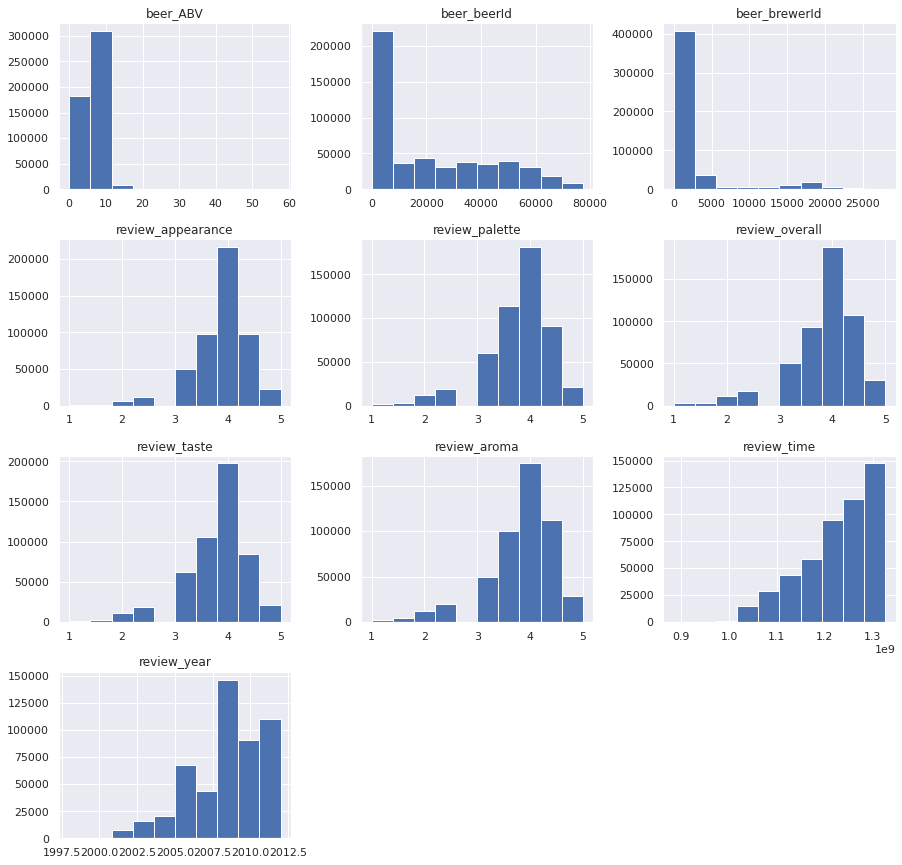

In [89]:
import matplotlib.pyplot as plt
df.hist(figsize=(15,15))
plt.show()

In [90]:
df.corr()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time,review_year
beer_ABV,1.000000,0.217181,0.078038,0.251925,0.318718,0.119012,0.268482,0.271048,0.142703,0.144351
beer_beerId,0.217181,1.000000,0.460998,0.050696,0.060392,-0.012672,0.035515,0.014182,0.460210,0.456741
beer_brewerId,0.078038,0.460998,1.000000,-0.004982,0.016693,-0.014871,-0.003169,-0.010225,0.246148,0.242578
review_appearance,0.251925,0.050696,-0.004982,1.000000,0.544205,0.482557,0.551336,0.530580,0.046290,0.047387
review_palette,0.318718,0.060392,0.016693,0.544205,1.000000,0.597818,0.600298,0.702959,0.049840,0.050162
review_overall,0.119012,-0.012672,-0.014871,0.482557,0.597818,1.000000,0.689077,0.780328,0.018139,0.019427
review_taste,0.268482,0.035515,-0.003169,0.551336,0.600298,0.689077,1.000000,0.722375,0.043697,0.044935
review_aroma,0.271048,0.014182,-0.010225,0.530580,0.702959,0.780328,0.722375,1.000000,0.028846,0.029887
review_time,0.142703,0.460210,0.246148,0.046290,0.049840,0.018139,0.043697,0.028846,1.000000,0.992318
review_year,0.144351,0.456741,0.242578,0.047387,0.050162,0.019427,0.044935,0.029887,0.992318,1.000000


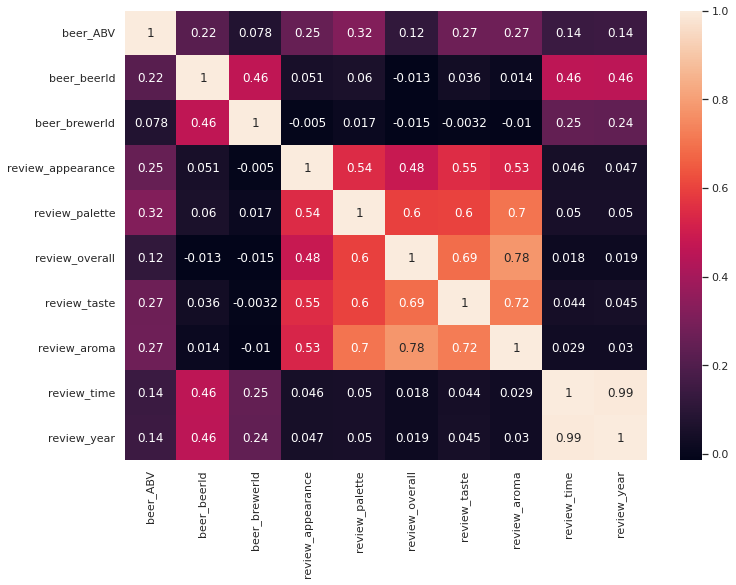

In [91]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), annot=True)
plt.show()

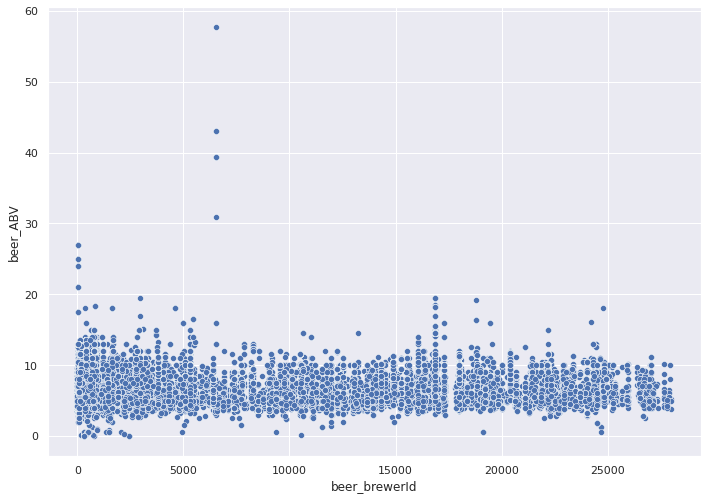

In [92]:
sns.scatterplot(x = df['beer_brewerId'], y = df['beer_ABV'])

###QUESTIONS
##1. Rank top 3 Breweries which produce the strongest beers?

In [93]:
data = df.groupby(['beer_brewerId'])['beer_ABV'].mean()
data

beer_brewerId
1        4.439773
3        5.537351
5        4.789855
10       4.973214
14       6.957675
           ...   
27870    6.000000
27879    5.500000
27917    8.000000
27922    7.450000
27980    4.666667
Name: beer_ABV, Length: 1607, dtype: float64

In [94]:
strong_beer = pd.DataFrame(data.reset_index())
strong_beer

,beer_brewerId,beer_ABV
0,1,4.439773
1,3,5.537351
2,5,4.789855
3,10,4.973214
4,14,6.957675
...,...,...
1602,27870,6.000000
1603,27879,5.500000
1604,27917,8.000000
1605,27922,7.450000


In [95]:
strong_beer.columns = ['beer_brewerId','beer_ABV_mean']
strong_beer

,beer_brewerId,beer_ABV_mean
0,1,4.439773
1,3,5.537351
2,5,4.789855
3,10,4.973214
4,14,6.957675
...,...,...
1602,27870,6.000000
1603,27879,5.500000
1604,27917,8.000000
1605,27922,7.450000


In [96]:
strongest_beer = strong_beer.sort_values(by=['beer_ABV_mean'], ascending=False).head(3)

In [97]:
strongest_beer

,beer_brewerId,beer_ABV_mean
699,6513,19.228824
165,736,13.750000
1466,24215,12.466667


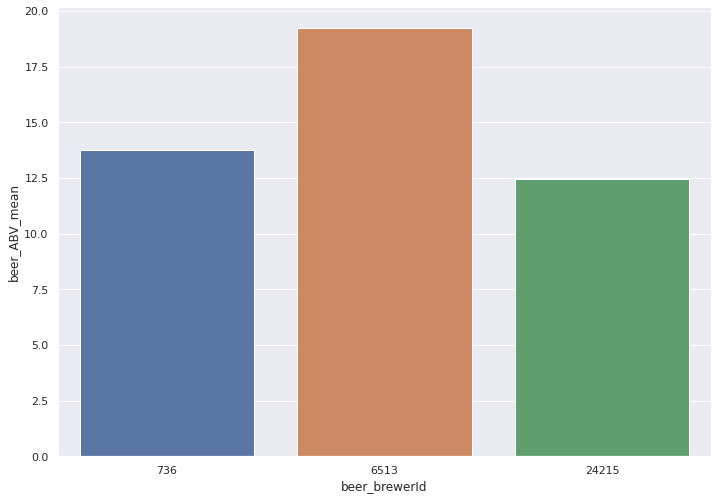

In [98]:
sns.barplot(x=strongest_beer['beer_brewerId'], y=strongest_beer['beer_ABV_mean'])

##2. Which year did beers enjoy the highest ratings?

We have done groub by using the review year and then taken th mean of review overall for that particular year

In [99]:
reviews_df = df.groupby('review_year').agg({'review_overall': np.mean})
reviews_df = pd.DataFrame(reviews_df.reset_index())
reviews_df.columns = ['review_year','review_overall_mean']
reviews_df

,review_year,review_overall_mean
0,1998,4.045455
1,1999,4.000000
2,2000,4.241379
3,2001,3.963687
4,2002,3.822060
5,2003,3.775017
6,2004,3.806983
7,2005,3.845787
8,2006,3.809447
9,2007,3.819612


Sorting in the descending year

In [100]:
top_reviews_df = reviews_df.sort_values(['review_overall_mean'], ascending=[False])
top_reviews_df

,review_year,review_overall_mean
2,2000,4.241379
0,1998,4.045455
1,1999,4.000000
3,2001,3.963687
12,2010,3.869730
11,2009,3.868657
7,2005,3.845787
10,2008,3.840451
14,2012,3.839105
13,2011,3.833515


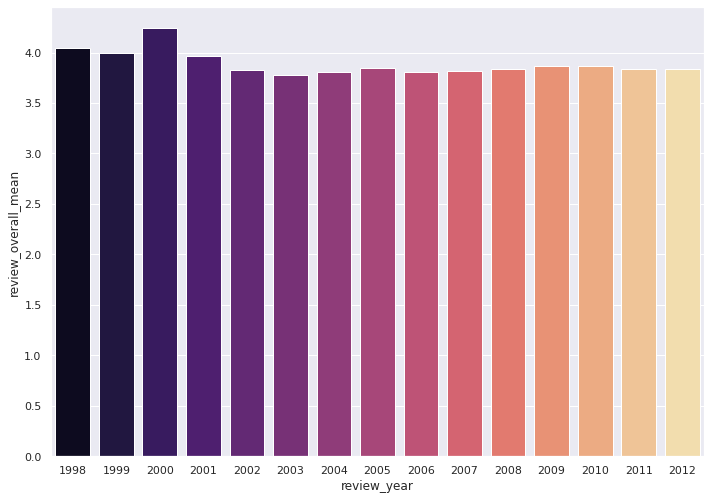

In [101]:
sns.barplot(x=top_reviews_df['review_year'], y=top_reviews_df['review_overall_mean'],palette="magma")

From the above figure we cn easily coclude that in the year 2000 the beers enjoyed the highest ratings

##3.Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

In [102]:
factors_df = df[['review_overall','review_aroma','review_taste','review_appearance','review_palette']]
factors_df.head()

,review_overall,review_aroma,review_taste,review_appearance,review_palette
492945,5.0,5.0,4.5,4.5,3.0
172728,5.0,4.0,4.5,5.0,3.0
409699,5.0,4.5,4.5,4.0,4.0
517331,5.0,4.5,4.5,4.5,4.5
172704,5.0,5.0,4.0,3.0,3.5


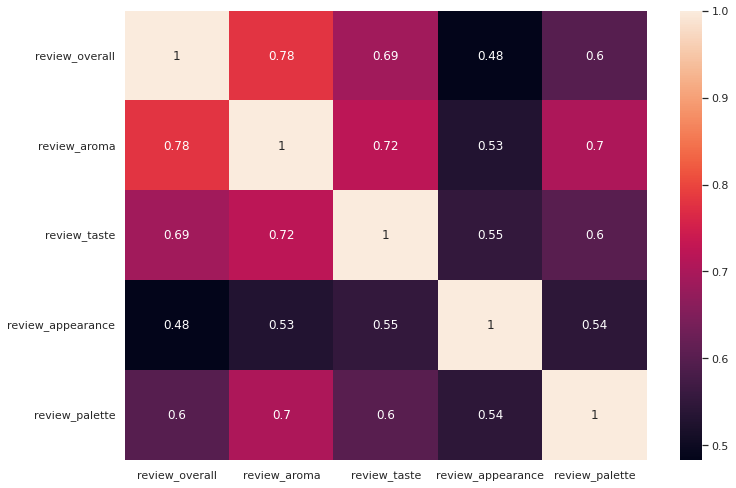

In [103]:
sns.heatmap(factors_df.corr(), annot=True)
plt.show()

In [104]:
features_df = factors_df.drop(["review_overall"], axis=1).columns
features_df

Index(['review_aroma', 'review_taste', 'review_appearance', 'review_palette'], dtype='object')

In [105]:
from sklearn.ensemble import RandomForestRegressor
rnd_clf = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(factors_df[features_df].values, factors_df["review_overall"].values)
feature_importance = rnd_clf.feature_importances_

In [106]:
for name, score in zip(features_df, feature_importance):
    print(name, score)

review_aroma 0.9249452675918192
review_taste 0.05632294484503473
review_appearance 0.009878765915023813
review_palette 0.008853021648122265


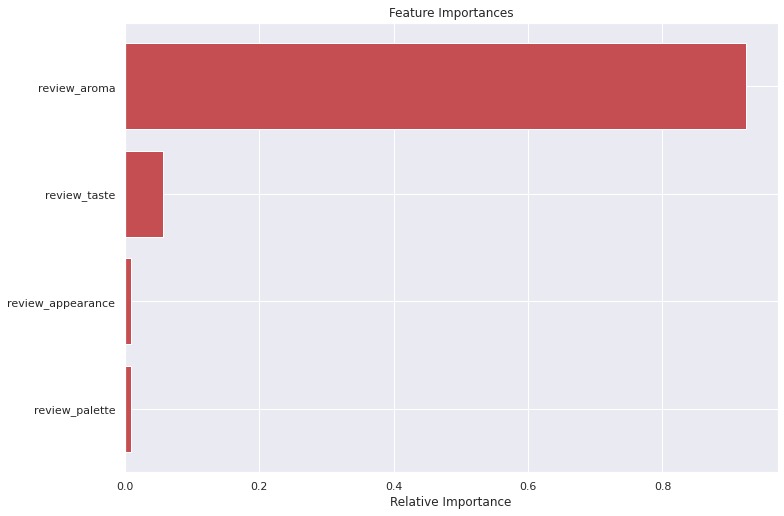

In [107]:
indices = np.argsort(feature_importance)
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='r', align='center')
plt.yticks(range(len(indices)), features_df[indices])
plt.xlabel('Relative Importance')
plt.show()

importance factors are review_aroma > review_taste > review_appearance > review_palette

##4.If you were to recommend 3 beers to your friends based on this data which ones will you recommend

In [108]:
three_beers =  df[['beer_beerId','beer_name','review_overall', 'review_aroma','review_appearance','review_palette','review_taste','beer_style']]
three_beers_reviews = three_beers.groupby('beer_beerId').agg({'review_overall': np.mean,'review_aroma': np.mean,'review_appearance': np.mean,'review_palette': np.mean,'review_taste': np.mean})
three_beers_reviews = pd.DataFrame(three_beers_reviews.reset_index()).sort_values(['review_overall', 'review_aroma','review_appearance','review_palette','review_taste'], ascending=[False,False, False, False, False])


In [109]:
three_beers.head()

,beer_beerId,beer_name,review_overall,review_aroma,review_appearance,review_palette,review_taste,beer_style
492945,1339,Hazelnut Brown Nectar,5.0,5.0,4.5,3.0,4.5,American Brown Ale
172728,689,Red Stripe Jamaican Lager,5.0,4.0,5.0,3.0,4.5,American Adjunct Lager
409699,15881,Tröegs Nugget Nectar,5.0,4.5,4.0,4.0,4.5,American Amber / Red Ale
517331,571,Samuel Smith's Oatmeal Stout,5.0,4.5,4.5,4.5,4.5,Oatmeal Stout
172704,689,Red Stripe Jamaican Lager,5.0,5.0,3.0,3.5,4.0,American Adjunct Lager


In [110]:
three_beers_reviews.head()

,beer_beerId,review_overall,review_aroma,review_appearance,review_palette,review_taste
349,1734,5.0,5.0,5.0,5.0,5.0
5201,29423,5.0,5.0,5.0,5.0,5.0
7402,41833,5.0,5.0,5.0,5.0,5.0
8156,45944,5.0,5.0,5.0,5.0,5.0
12497,66415,5.0,5.0,5.0,5.0,5.0


Lets find the number of reviews for every beer

In [111]:
three_beers_count = df.groupby('beer_beerId').agg({'review_overall': np.size})
three_beers_count = pd.DataFrame(three_beers_count.reset_index())
three_beers_count.columns = ['beer_beerId','reviews_count']
three_beers_count = pd.merge(three_beers_count,three_beers[['beer_beerId','beer_name','beer_style']],on='beer_beerId') 
three_beers_count = three_beers_count.drop_duplicates(subset= ['beer_beerId','reviews_count'], keep='first')
three_beers_count

,beer_beerId,reviews_count,beer_name,beer_style
0,5,420.0,Amber,Vienna Lager
420,6,871.0,Turbodog,English Brown Ale
1291,7,655.0,Purple Haze,Fruit / Vegetable Beer
1946,8,68.0,Wheat,American Adjunct Lager
2014,9,116.0,Golden,American Pale Lager
...,...,...,...,...
503692,77302,1.0,Ambrée De Bourgogne,American Amber / Red Ale
503693,77303,1.0,Fuggit Stout,English Stout
503694,77305,1.0,Batch 13,American IPA
503695,77307,1.0,White Out,Oatmeal Stout


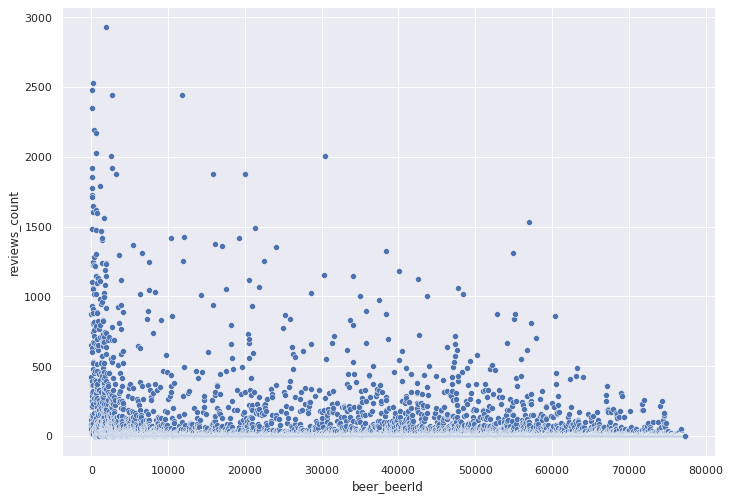

In [112]:
sns.scatterplot(x = three_beers_count['beer_beerId'], y = three_beers_count['reviews_count'])

In [113]:
recommend_beers = pd.merge(three_beers_count,three_beers_reviews[['beer_beerId','review_overall', 'review_aroma','review_appearance','review_palette','review_taste']],on='beer_beerId') 
recommend_beers = recommend_beers.sort_values(['reviews_count','review_overall', 'review_aroma','review_appearance','review_palette','review_taste'], ascending=[False,False, False, False, False,False])
recommend_beers


,beer_beerId,reviews_count,beer_name,beer_style,review_overall,review_aroma,review_appearance,review_palette,review_taste
374,1904,2928.0,Sierra Nevada Celebration Ale,American IPA,4.171960,4.190574,4.224898,4.083163,4.075820
63,276,2525.0,Sierra Nevada Pale Ale,American Pale Ale (APA),4.252475,4.118020,3.995050,3.914851,3.970693
13,34,2477.0,La Fin Du Monde,Tripel,4.297537,4.396044,4.192975,4.230723,4.264029
2086,11757,2443.0,Founders Breakfast Stout,American Double / Imperial Stout,4.359394,4.502661,4.365944,4.412812,4.389071
516,2671,2443.0,Sierra Nevada Bigfoot Barleywine Style Ale,American Barleywine,3.970528,4.191363,4.259312,4.157593,4.126074
...,...,...,...,...,...,...,...,...,...
2894,16191,1.0,Sunshine Coast Noosa Premium Ale,American Adjunct Lager,1.000000,1.000000,1.000000,1.000000,1.000000
3484,19369,1.0,Bintara Pilsner,Czech Pilsener,1.000000,1.000000,1.000000,1.000000,1.000000
3577,20011,1.0,Tango,Fruit / Vegetable Beer,1.000000,1.000000,1.000000,1.000000,1.000000
4072,22980,1.0,Bowes Dry Treebu,American Adjunct Lager,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
test_df = recommend_beers.loc[(recommend_beers['beer_beerId']==1734) |(recommend_beers['beer_beerId']==29423) | (recommend_beers['beer_beerId']==41833) | (recommend_beers['beer_beerId']==45944) | (recommend_beers['beer_beerId']==66415) ]
test_df

,beer_beerId,reviews_count,beer_name,beer_style,review_overall,review_aroma,review_appearance,review_palette,review_taste
349,1734,1.0,Edsten Triple-Wit,Belgian Strong Pale Ale,5.0,5.0,5.0,5.0,5.0
5201,29423,1.0,Old Gander Barley Wine,American Barleywine,5.0,5.0,5.0,5.0,5.0
7402,41833,1.0,Fritzkrieg Hop IPA,American IPA,5.0,5.0,5.0,5.0,5.0
8156,45944,1.0,Rogue Black Brutal,Schwarzbier,5.0,5.0,5.0,5.0,5.0
12497,66415,1.0,Belgian Dubbel,Dubbel,5.0,5.0,5.0,5.0,5.0


as seen in the above data frame the beers getting 5 star review has review count of only 1 , thus it is clear that the bears having 5 star reviews or close to 5 star reviews with less review_count cannot be the best beers to recommend

In [115]:
top_recommended_beers = recommend_beers.head(3)
top_recommended_beers

,beer_beerId,reviews_count,beer_name,beer_style,review_overall,review_aroma,review_appearance,review_palette,review_taste
374,1904,2928.0,Sierra Nevada Celebration Ale,American IPA,4.171960,4.190574,4.224898,4.083163,4.075820
63,276,2525.0,Sierra Nevada Pale Ale,American Pale Ale (APA),4.252475,4.118020,3.995050,3.914851,3.970693
13,34,2477.0,La Fin Du Monde,Tripel,4.297537,4.396044,4.192975,4.230723,4.264029


The top 3 beers I would recommend based on given data are
Sierra Nevada Celebration Ale(1904), Sierra Nevada Pale Ale(276), La Fin Du Monde(34)